In [1]:
%matplotlib inline

# String-searching algorithms - 4 BIM
### Sergio Peignier (sergio.peignier@insa-lyon.fr)
+ Let $A=\{a_1,a_2,...\}$ be an alphabet of letters
+ Let  $T=(t_1,t_2,... \; | \;\forall t_i \in A)$ be a string with size $|T|$
+ Let $S=(s_1,s_2,... \; | \;\forall s_i \in A)$ be a string with size $|M|$
+ Let $S[i] = s_i$ being the letter at position $i$ in string $S$
+ Let $S[i,j] = (s_i,...s_j)$ being the substring of $S$ between positions $i$ and $j$
+ Let $S[1,j] $ being a prefix of $S$
+ Let $S[j,n] $ being a suffix of $S$

# 1) Impact of alphabet size and sequence length on similarity
+ Let $T$ and $S$ be two random strings, let $A$ be their alphabet, and let $|T| = |S|$.
+ Let $d(T,S) = |\{i \quad \forall i \in \{1,..., |S|\} \; | \; T[i]\neq S[i])$ be the Hamming distance between $T$ and $S$, i.e., number of positions where both strings differ.  
+ Compute the probability that $d(T,S)=k$, given that $T$ and $S$ are two random strings, assuming that the probabilities of drawing the string letters are $i.i.d.$, and assuming equiprobability 
+ Plot this probability as a function of $|T|$ and $|A|$
+ Write down your conclusions and interpretation

# 2) String Search Problem Statement - Naive algorithm

Given $S$ and $T$ being two strings as defined previously, and assuming $|S| < |T|$

**Problem**: is $S$ a sub-string of $T$?

+ Write down the mathematical formulation of this problem
+ Write another possible problem derived from the aforementioned one

The following naive Python code (next box) tackles this problem, and returns the location of the first instance of $S$ in $T$

+ Compute its complexity (assuming $n = |S|$ and $m = |T|$)
+ Write a function to generate random DNA sequences with a given length. 
+ Estimate the time taken by the previous algorithm to search a string $S$ in a document $T$, as a function of the sizes $n$ and $m$.
+ Compare the algorithm's real behavior w.r.t. its complexity, can you write a new algorithm, that would deliver worse results? 

+ Let us consider the following simple procedure to compare two large strings $T_1$ and $T_2$:
    + Split $T_1$ in $N$ small fragments of size $n$
    + Search each one of the $N$ fragments of $T_1$ in $T_2$

Given that the human genome contains $~ 3 \times 10^9$ bps, and the dog genome contains $~ 2.5 \times 10^9$ bps, and taking $n=50$. How many operations does this procedure need to execute? Evaluate the time taken by a single comparison operation, how long would it take to compare both genomes with this simple procedure?

In [54]:
def naive_string_search(T,S):
    for i in range(len(T) - len(S)):
        j = 0
        while j < len(S) and T[i+j] == S[j]:
            j += 1
        if j == len(S):
            return(i)

In [56]:
naive_string_search("Dans l'herbe noire Les Kobolds vont. Le vent profond Pleure, on veut croire.","Kobold")

23

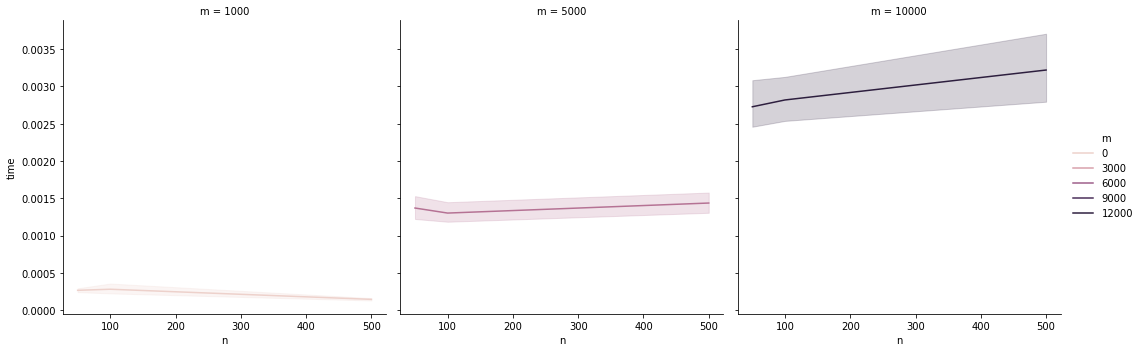

In [68]:
# To plot the results you can use the following seeaborn function (you should provide "results" a dataframe containing n, m and the time as columns
sns.relplot(
    data=results, x="n", y="time",
    col="m", hue="m",
    kind="line"
)

# 2) String Search Problem Statement - Indexation
## Searching in a dictionary
+ The dictionary analogy: Let $L=(w_1,w_2,\dots)$ be an ordered list of words (strings), a sort of dictionary
+ The algorithm below allows to search a word in a dictionary efficiently
+ Compute the complexity of searching a sub-string within a dictionary

In [107]:
def dichotomic_search(ordered_list, word, start, stop): 
    search_position = (start + stop) // 2
    if start <= stop:
        if ordered_list[search_position] == word: 
            return search_position 
        # The element is smaller, then it is in the left part 
        elif ordered_list[search_position] > word: 
            return dichotomic_search(ordered_list, word, start, search_position - 1) 
        else: 
            return dichotomic_search(ordered_list, word, search_position + 1, stop) 
    return -1


In [110]:
dichotomy_search("kobols",["abcs","csvsds","dsfsdf","efr","kobols","y","zer"])

4

## Storing a string as a dictionary
+ Let us consider the following naive procedure to detect a substring $S$ in a string $T$ using the dichotomy search (here $T$ could be a genome)
    + Extract all the possible substrings contained in the string $T$
    + Sort them and store them in a dictionary
    + Search the query substring within thee dictionary
+ Who many possible substrings does the string $T$ contains?
+ Do we need to store all possible substrings?
+ In fact, only storing the suffixes of $T$ is sufficient. Why? How many suffixes are there? 
+ Write a function that extracts all the suffixes of a string $T$, sorts them and returns an ordered list
+ Modify the previous code, in order to also output the list of suffixes starting indexes, a.k.a. __suffix table__
+ Determine the complexity of the suffix table construction (time) and storage (space)
+ Compute the complexity of searching a substring in such a table
+ Write a function that searches a substring a in string stored as a suffix table
+ Download a virus genome, load it, index it and launch some simple queries (you can load the sequence using the __SeqIO.parse__ function of the BioPython package